In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report

import firebase_admin
from firebase_admin import credentials, firestore
from torchvision import datasets

#### Firebase Setup ##################################################################################################################
if not firebase_admin._apps:
    cred = credentials.Certificate('serviceAccount.json')
    firebase_admin.initialize_app(cred)
db = firestore.client()

print("Firebase ok")

/home/andrea/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/andrea/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:644: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Firebase ok


In [2]:
labels = []
docs = db.collection('llava_miniImageNet').stream()

true_labels = []
predicted_labels = []

for doc in docs:
    doc_ref = db.collection('llava_miniImageNet').document(doc.id)
    doc_dict = doc.to_dict()

    if doc.id == "last_index":
        continue

    if 'Predicted_Label' in doc_dict:
        true_labels.append(doc_dict['True_Label'].lower().strip().replace(' ', '_'))
        predicted_labels.append(doc_dict['Predicted_Label'].lower().strip().replace(' ', '_'))

labels = np.unique(np.concatenate((predicted_labels, true_labels)))
# labels = np.unique(predicted_labels)

In [3]:
for el in predicted_labels:
    if (el not in labels):
        print(f"ERROR: {el}")

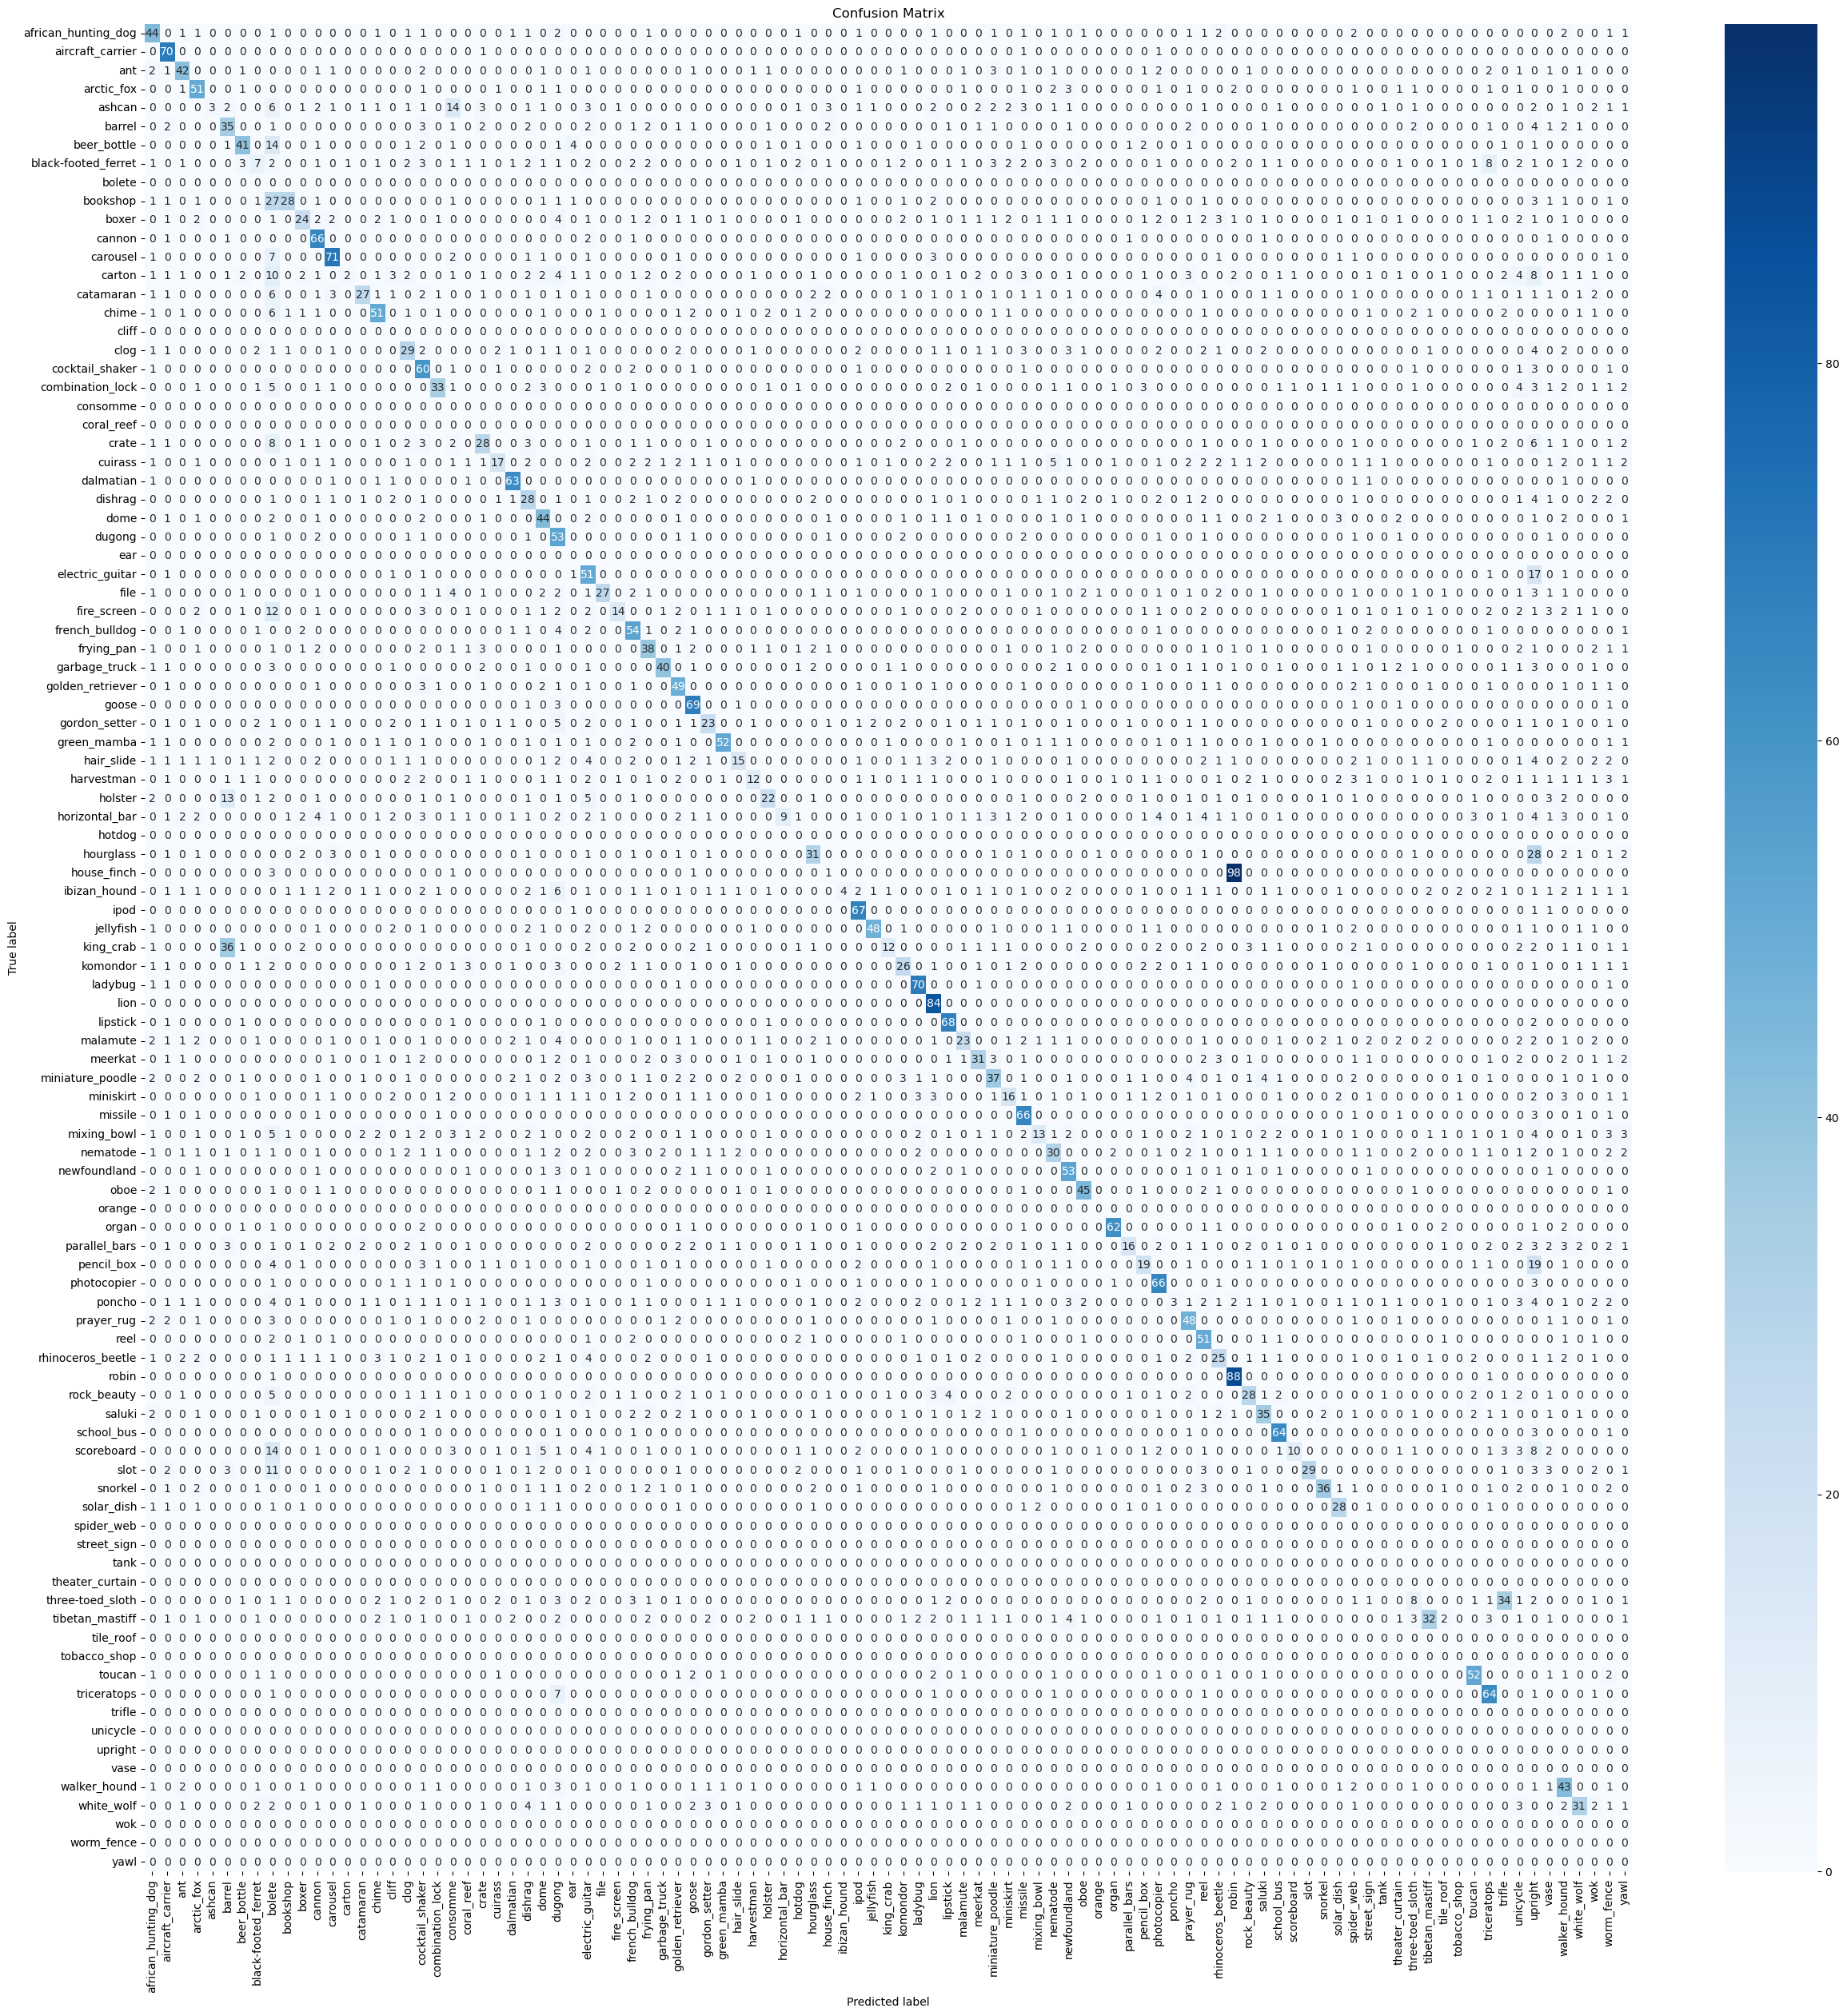

In [4]:
confusion_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(30, 30))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [5]:
classification_report = classification_report(true_labels, predicted_labels, target_names=labels)

with open("llava_5w.txt", "w") as f:
    print(classification_report, file=f)

print(classification_report)

                     precision    recall  f1-score   support

african_hunting_dog       0.52      0.61      0.56        72
   aircraft_carrier       0.65      0.96      0.78        73
                ant       0.68      0.59      0.63        71
         arctic_fox       0.61      0.68      0.64        75
             ashcan       0.75      0.04      0.08        72
             barrel       0.36      0.47      0.41        74
        beer_bottle       0.69      0.53      0.60        77
black-footed_ferret       0.25      0.09      0.13        80
             bolete       0.00      0.00      0.00         0
           bookshop       0.78      0.37      0.50        76
              boxer       0.52      0.30      0.38        79
             cannon       0.60      0.89      0.72        74
           carousel       0.72      0.76      0.74        93
             carton       0.50      0.02      0.05        82
          catamaran       0.73      0.36      0.48        76
              chime    

/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
